# Logistic Regression 

**Important Parameters**

**Relevant Information**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error

## Data

In [2]:
housing = fetch_california_housing()
df = pd.DataFrame(data = housing.data, columns=housing.feature_names)
df["target"] = pd.Series(housing.target)
df.columns = df.columns.str.lower()
df

,medinc,houseage,averooms,avebedrms,population,aveoccup,latitude,longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [3]:
numerical_features = [
    "medinc",
    "houseage",
    "averooms",
    "avebedrms",
    "population",
    "aveoccup", 
    "latitude", 
    "longitude",
]
ordinal_features = []
nominal_features = []
target_colum = ["target"]

## Preprocessing

In [4]:
X = df.drop(columns=target_colum)
y = df[target_colum]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)
X_train.shape, X_test.shape

((16512, 8), (4128, 8))

In [5]:
# Preprocessing Pipelines
numeric_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="mean")),
        ("scaler", MinMaxScaler()),
    ]
)

ordinal_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="constant", fill_value="UNKNOWN")),
        ("ordinal", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)),
    ]
)

one_hot_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="constant", fill_value="UNKNOWN")),
        ("ordinal", OneHotEncoder(handle_unknown="error")),
    ]
)

transformers = []
if numerical_features:
    transformers.append(("num", numeric_transformer, numerical_features))
if ordinal_features:
    transformers.append(("ord", ordinal_transformer , ordinal_features))
if nominal_features: 
    transformers.append(("nom", one_hot_transformer, nominal_features))

preprocessor = ColumnTransformer(
    transformers=transformers
)

In [6]:
preprocessor.fit(X_train)
X_train_pre = preprocessor.transform(X_train)
X_test_pre = preprocessor.transform(X_test)

In [7]:
new_features_names = []
for i in range(len(preprocessor.transformers_)):
    feature_names = preprocessor.transformers_[i][1].get_feature_names_out()
    new_features_names = new_features_names + list(feature_names)

X_train_pre = pd.DataFrame(data = X_train_pre, columns = new_features_names, index = X_train.index)
X_test_pre = pd.DataFrame(data = X_test_pre, columns = new_features_names, index = X_test.index)
X_train_pre

,medinc,houseage,averooms,avebedrms,population,aveoccup,latitude,longitude
7621,0.258624,0.333333,0.033714,0.020909,0.103655,0.001894,0.141339,0.607570
18863,0.179053,0.666667,0.030872,0.019182,0.033160,0.001788,0.591923,0.213147
10601,0.500614,0.137255,0.039208,0.020934,0.025283,0.001664,0.120085,0.651394
8483,0.333051,0.647059,0.033277,0.018807,0.025227,0.002383,0.146652,0.603586
1732,0.105888,0.607843,0.027369,0.025439,0.031758,0.001610,0.575983,0.199203
...,...,...,...,...,...,...,...,...
10654,0.232762,0.294118,0.022358,0.019763,0.000252,0.001857,0.120085,0.646414
8262,0.180342,0.862745,0.020338,0.023040,0.029179,0.000898,0.130712,0.615538
2878,0.034151,0.803922,0.022097,0.025612,0.028927,0.002237,0.301807,0.535857
7597,0.116129,0.607843,0.022764,0.018382,0.033776,0.002936,0.143464,0.608566


## Model 

In [8]:
model_reg_none = LinearRegression()
model_reg_l1 = Lasso(alpha=0.01)
model_reg_l2 = Ridge(alpha=1)

model_reg_none.fit(X_train_pre, y_train)
model_reg_l1.fit(X_train_pre, y_train)
model_reg_l2.fit(X_train_pre, y_train)

Ridge(alpha=1)

In [9]:
model_reg_l1.fit(X_train_pre, y_train)

Lasso(alpha=0.01)

In [10]:
print("Train Results")

y_pred_reg_none_train = model_reg_none.predict(X_train_pre)
y_pred_reg_l1_train = model_reg_l1.predict(X_train_pre)
y_pred_reg_l2_train = model_reg_l2.predict(X_train_pre)

reg_none_train_error = round(mean_squared_error(y_train, y_pred_reg_none_train),3)
reg_l1_train_error = round(mean_squared_error(y_train, y_pred_reg_l1_train),3)
reg_l2_train_error = round(mean_squared_error(y_train, y_pred_reg_l2_train),3)

print(f"MSE WO REG: {reg_none_train_error}")
print(f"MSE L1 REG: {reg_l1_train_error}")
print(f"MSE L2 REG: {reg_l2_train_error}")

print("Test Results")

y_pred_reg_none_test = model_reg_none.predict(X_test_pre)
y_pred_reg_l1_test = model_reg_l1.predict(X_test_pre)
y_pred_reg_l2_test = model_reg_l2.predict(X_test_pre)

reg_none_test_error = round(mean_squared_error(y_test, y_pred_reg_none_test),3)
reg_l1_test_error = round(mean_squared_error(y_test, y_pred_reg_l1_test),3)
reg_l2_test_error = round(mean_squared_error(y_test, y_pred_reg_l2_test),3)

print(f"MSE WO REG: {reg_none_test_error}")
print(f"MSE L1 REG: {reg_l1_test_error}")
print(f"MSE L2 REG: {reg_l2_test_error}")



Train Results
MSE WO REG: 0.521
MSE L1 REG: 0.597
MSE L2 REG: 0.528
Test Results
MSE WO REG: 0.537
MSE L1 REG: 0.615
MSE L2 REG: 0.546


## Plotting

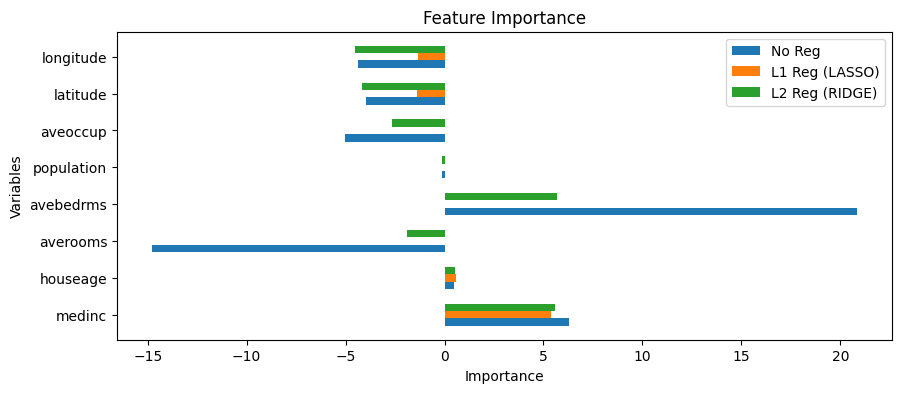

In [12]:
index = np.array(list(range(len(X_train_pre.columns))))

plt.figure(figsize=(10,4))
plt.barh(index - 0.2 , model_reg_none.coef_[0], label = "No Reg", height=0.2)
plt.barh(index       , model_reg_l1.coef_, label = "L1 Reg (LASSO)", height=0.2)
plt.barh(index + 0.2 , model_reg_l2.coef_[0], label = "L2 Reg (RIDGE)", height=0.2)
plt.yticks(index, X_train_pre.columns)
plt.xlabel("Importance")
plt.ylabel("Variables")
plt.legend()
plt.title("Feature Importance")
plt.savefig("img/regularization_feature_importance.png", dpi = 300, bbox_inches='tight')